# COVID-19 Visualization

## Import Libraries

In [0]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import files # for downloading data from the notebook

# Magic functions for printing high quality plots in the notebook
# They are not Python codes
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

## Visualizing US COVID-19 cases


### Total cases

In [0]:
data_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/e8945b9d8bfd524a8083f6935e6556162a90b10f/live/us-states.csv"
df = pd.read_csv(data_url)
df.head(5)

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-06-04,Alabama,1,19072,653,18766.0,651.0,306.0,2.0
1,2020-06-04,Alaska,2,524,10,524.0,10.0,0.0,0.0
2,2020-06-04,Arizona,4,22753,998,NaN,NaN,NaN,NaN
3,2020-06-04,Arkansas,5,8425,151,8425.0,151.0,0.0,0.0
4,2020-06-04,California,6,122596,4480,122596.0,4480.0,0.0,0.0


In [0]:
cases_df = df.dropna(axis='index') # drop all the rows with Not a Number (NaN)
cases_df.head(10)

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-06-04,Alabama,1,19072,653,18766.0,651.0,306.0,2.0
1,2020-06-04,Alaska,2,524,10,524.0,10.0,0.0,0.0
3,2020-06-04,Arkansas,5,8425,151,8425.0,151.0,0.0,0.0
4,2020-06-04,California,6,122596,4480,122596.0,4480.0,0.0,0.0
8,2020-06-04,District of Columbia,11,9120,475,9120.0,475.0,0.0,0.0
9,2020-06-04,Florida,12,60175,2606,60175.0,2606.0,0.0,0.0
10,2020-06-04,Georgia,13,47528,2116,47528.0,2116.0,0.0,0.0
11,2020-06-04,Guam,66,1148,6,1140.0,6.0,8.0,0.0
13,2020-06-04,Idaho,16,2990,83,2709.0,78.0,281.0,5.0
14,2020-06-04,Illinois,17,125114,5772,125114.0,5772.0,0.0,0.0


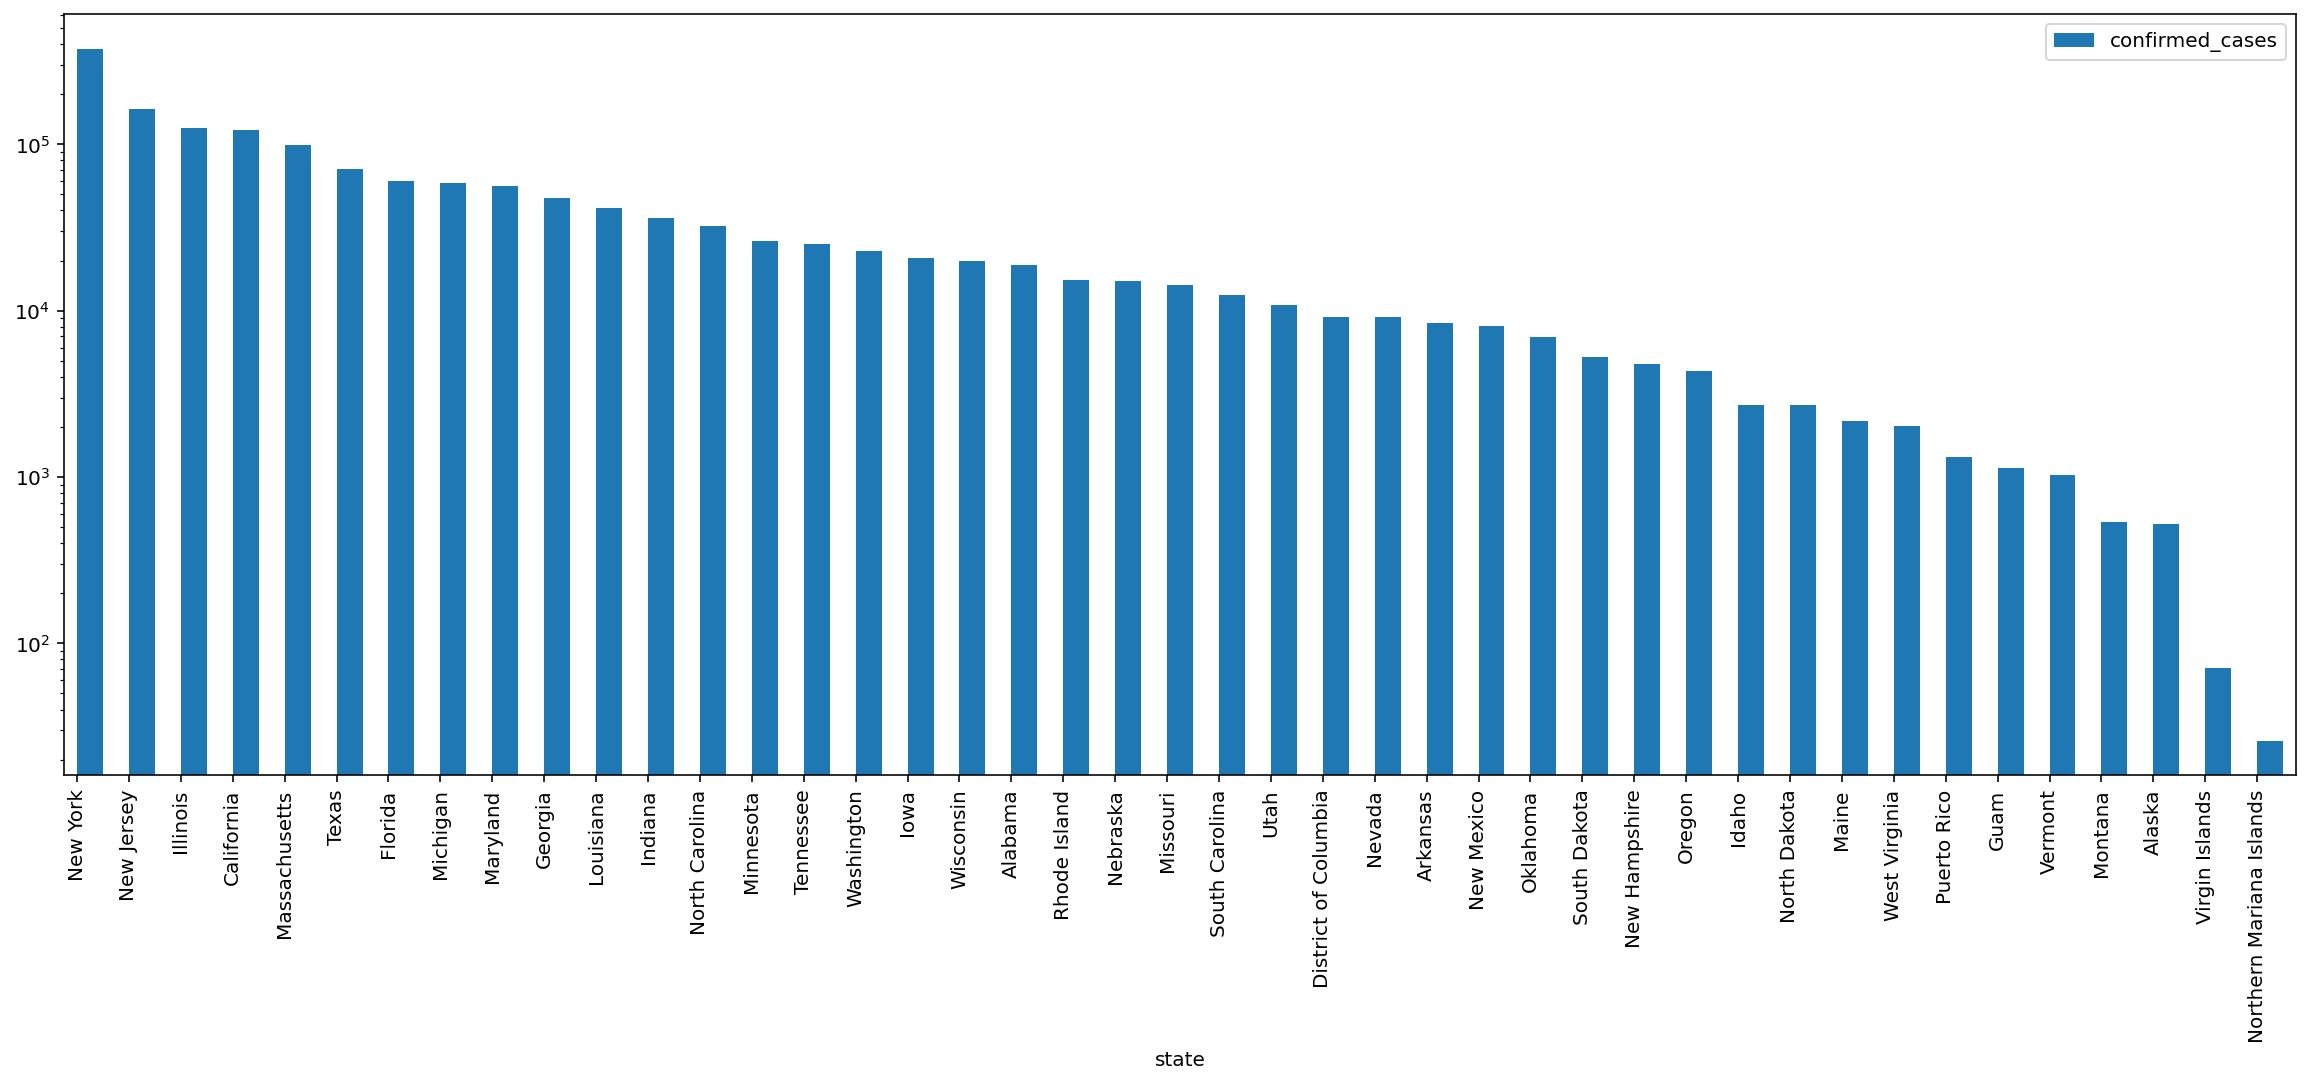

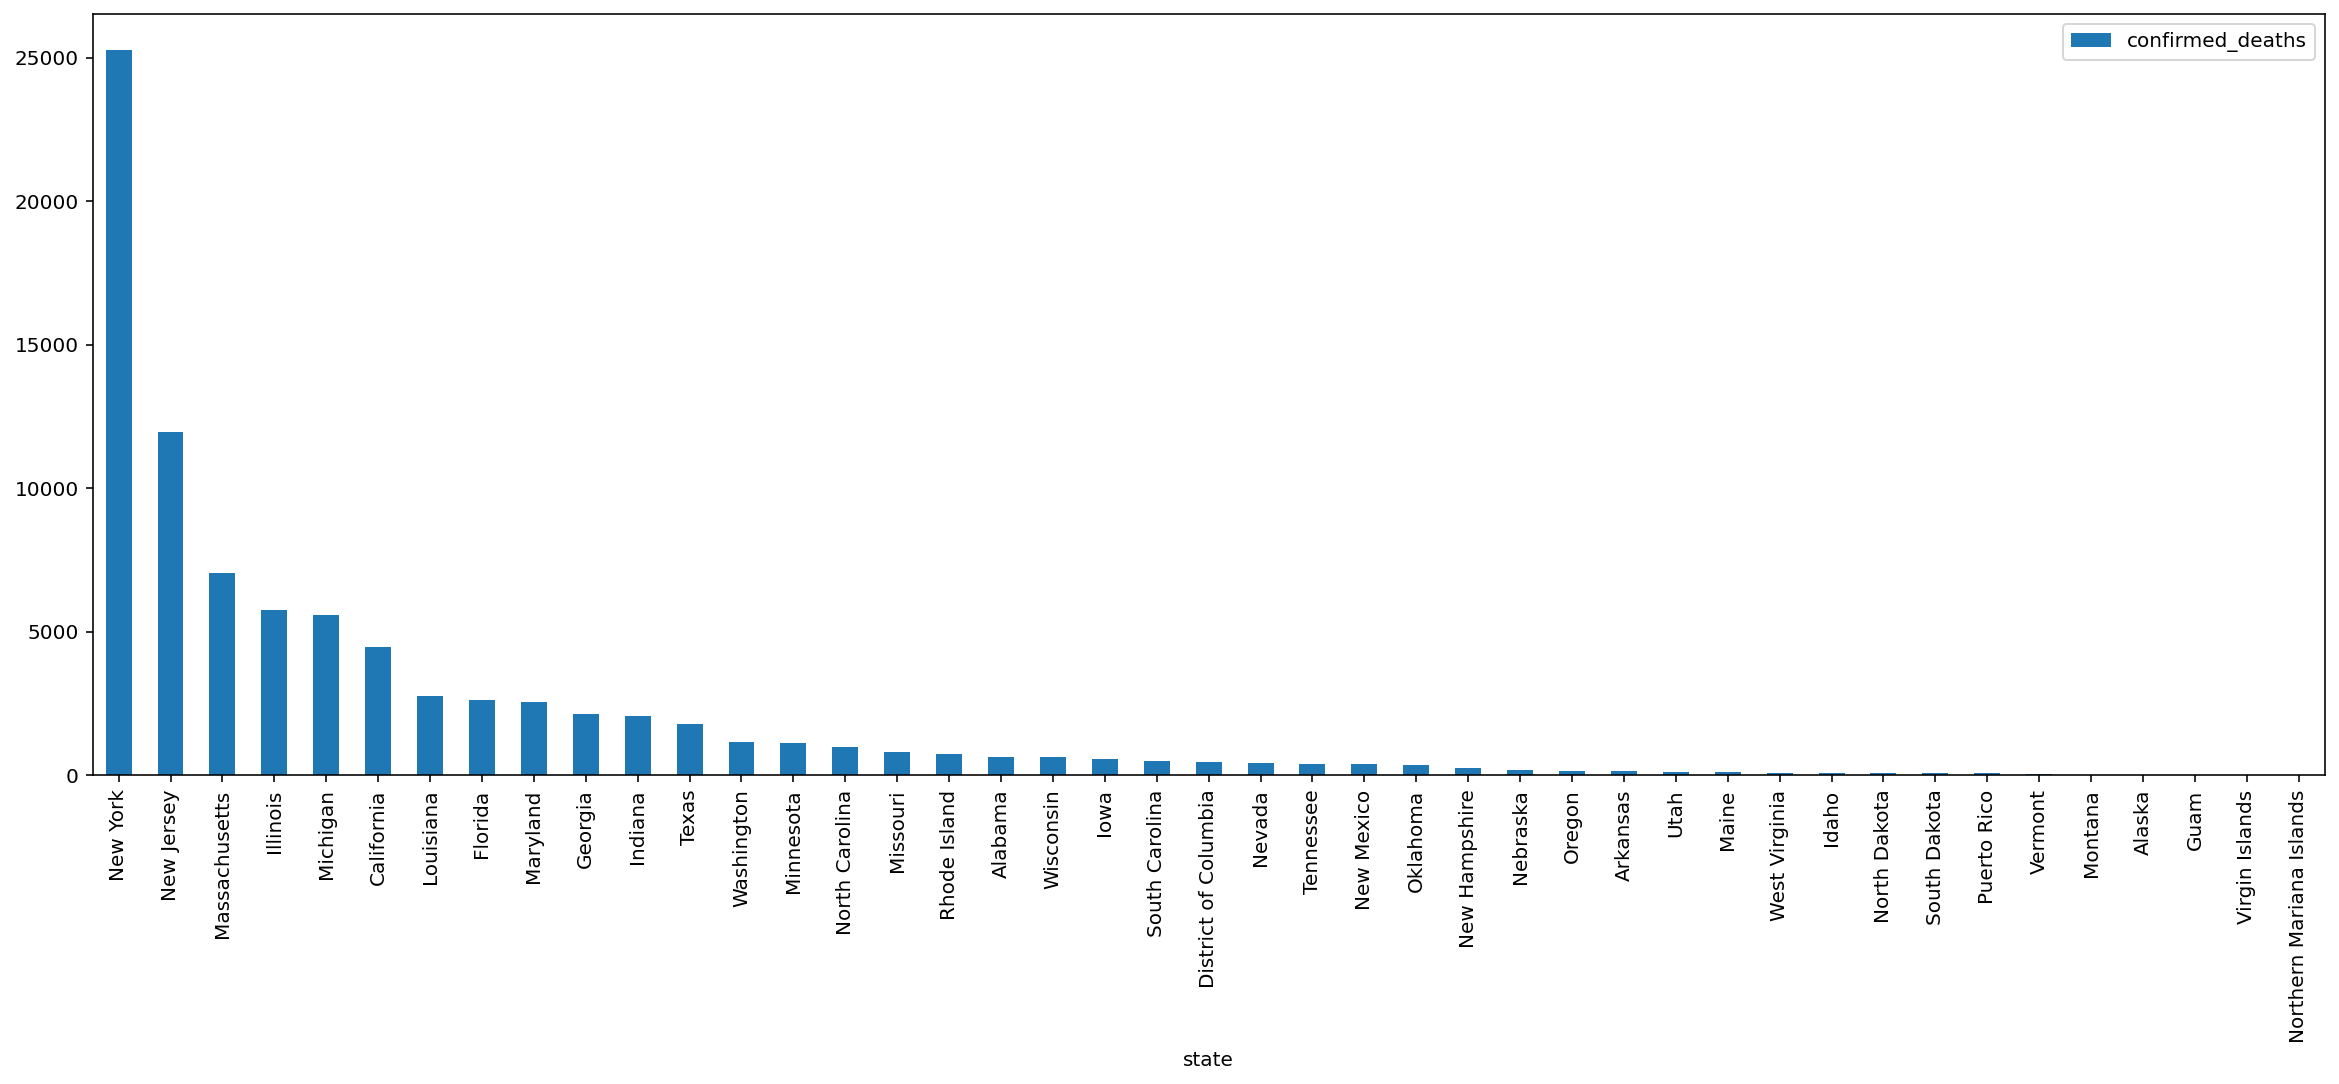

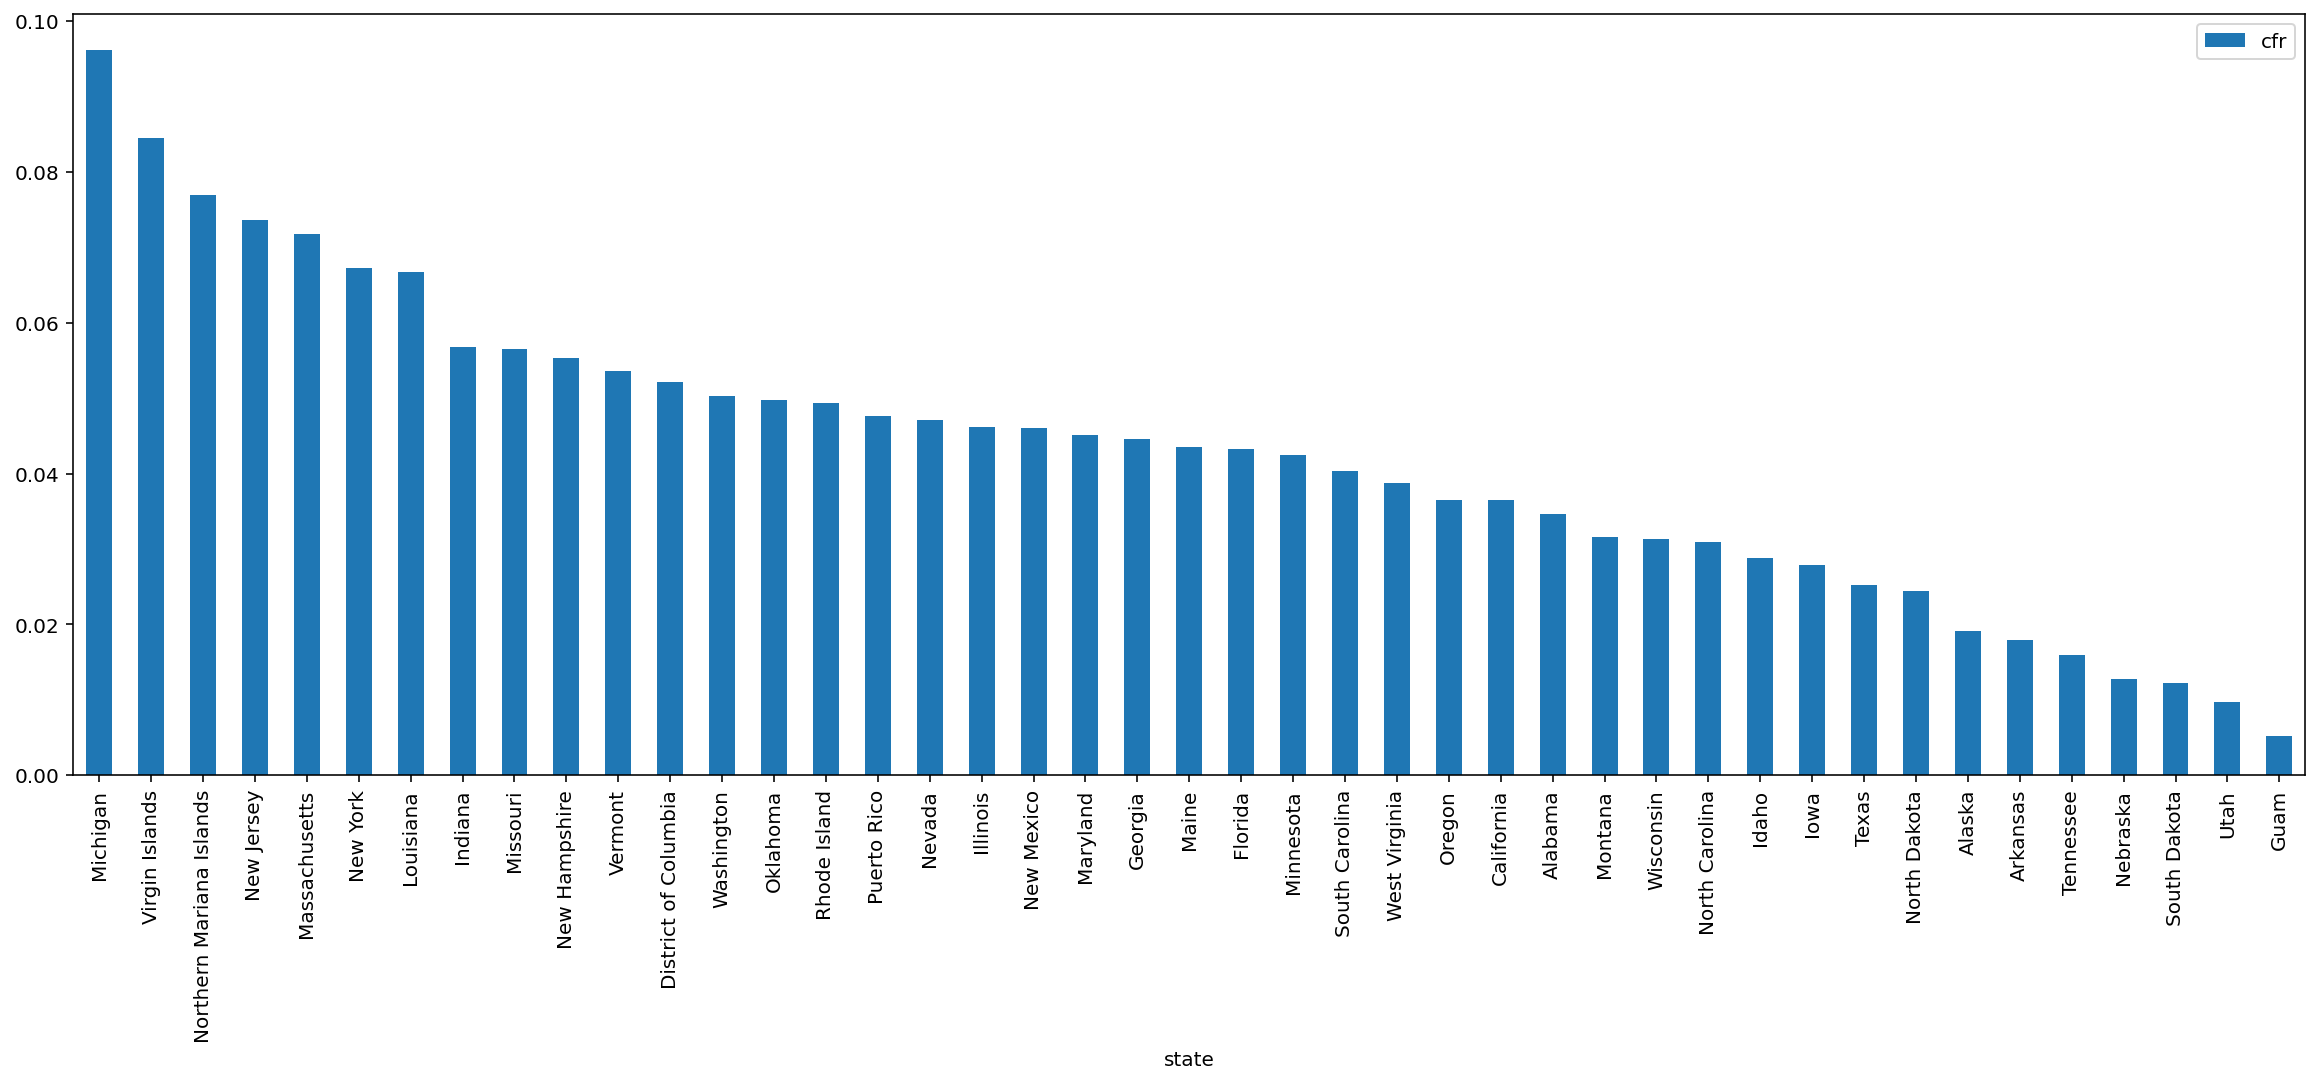

In [0]:
# Plot some simple bar graphs
cases_df = cases_df.sort_values(by='confirmed_cases', ascending=False) # sort by descending order
ax1 = cases_df.plot.bar(x='state', y='confirmed_cases', 
                   figsize=(20,7), position=0) # use pandas integration of matplotlib
ax1.set_yscale('log')

cases_df = cases_df.sort_values(by='confirmed_deaths', ascending=False) # sort by descending order
ax2 = cases_df.plot.bar(x='state', y='confirmed_deaths', 
                  figsize=(20,7)) # use pandas integration of matplotlib

df['cfr'] = df['confirmed_deaths']/df['confirmed_cases'] # add a column to the dataframe
cases_df = df.dropna(axis='index') # drop the NaN rows again
cases_df = cases_df.sort_values(by='cfr', ascending=False) # sort by descending order
ax3 = cases_df.plot.bar(x='state', y='cfr', 
                  figsize=(20,7)) # use pandas integration of matplotlib
plt.show()

### US population

In [0]:
# Find state population
population_url = "https://raw.githubusercontent.com/ylin910095/data_visualization_2020/master/csv/us_population_states/population_state.csv"
# We need special encoding because the file is presumably create in Windows
population_df = pd.read_csv(population_url) 
population_df.head(10)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,BIRTHS2019,DEATHS2010,DEATHS2011,DEATHS2012,...,RDEATH2016,RDEATH2017,RDEATH2018,RDEATH2019,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RNATURALINC2019,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RINTERNATIONALMIG2019,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3824521,3791712,598691,2512442,2501531,...,8.400602,8.606413,8.668095,8.657569,4.706373,4.590575,4.231517,4.353645,4.045944,3.913875,3.438101,3.069450,2.921467,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,61691,224089,170993,126590,104205,28673,7646,16910,-12620,-63817,163466,646249,637860,635751,632433,634504,628030,618490,610713,602740,110878,470811,460915,...,8.574497,8.883355,8.975017,9.025986,3.161491,3.177337,2.789974,2.898189,2.593611,2.632618,2.151103,1.920274,1.734402,3.680555,3.681434,3.428960,3.931182,4.009115,4.177449,3.809171,3.195141,2.394817,-2.792646,-3.719789,-3.898743,-4.917279,-6.071080,-6.667933,-5.646219,-5.329588,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,44691,183384,178943,223636,184788,115416,126957,139241,109847,92376,212570,834866,830701,830890,836538,838012,831641,818785,801587,792343,140862,586660,584671,...,9.115871,9.409840,9.209377,9.121680,3.700916,3.658587,3.346624,3.542205,3.125649,3.127816,2.621003,2.547252,2.482162,1.713906,1.767566,1.845688,1.951908,2.070856,2.106735,1.825671,1.380898,1.254708,-2.677835,-2.741509,-1.852612,-2.714878,-3.459293,-3.348519,-2.383041,-2.303653,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,303650,1139842,1234686,1123192,1259637,1373304,1354419,1190429,1027244,1011015,368759,1509634,1504955,1504774,1525313,1545679,1541412,1519344,1494950,1481244,228435,963051,960791,...,8.695993,8.884440,9.003440,8.971661,4.734919,4.665975,4.189603,4.363271,4.101489,3.972326,3.473278,3.047185,2.871191,2.422447,2.898420,2.745376,3.013508,3.507594,3.521386,3.220112,2.415429,1.942372,2.708067,2.952037,2.546697,3.147993,3.769765,3.628688,2.978056,2.810090,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78

 We only need three columns here: 
*   `NAME`: State name
*   `STATE`: State FIPS code (2-digit)
*   `POPESTIMATE2019`: 7/1/2019 resident total population estimate

See https://github.com/ylin910095/data_visualization_2020/blob/master/csv/us_population_states/README.pdf for a detailed description of all the columns.


In [0]:
# Now we can visualize the population in each state
state_pop_df = population_df.iloc[5:] # remove the first couple rows
state_pop_df = state_pop_df[['NAME', 'STATE', 'POPESTIMATE2019']] # only retain those three columns
state_pop_df.head(10)

,NAME,STATE,POPESTIMATE2019
5,Alabama,1,4903185
6,Alaska,2,731545
7,Arizona,4,7278717
8,Arkansas,5,3017804
9,California,6,39512223
10,Colorado,8,5758736
11,Connecticut,9,3565287
12,Delaware,10,973764
13,District of Columbia,11,705749
14,Florida,12,21477737


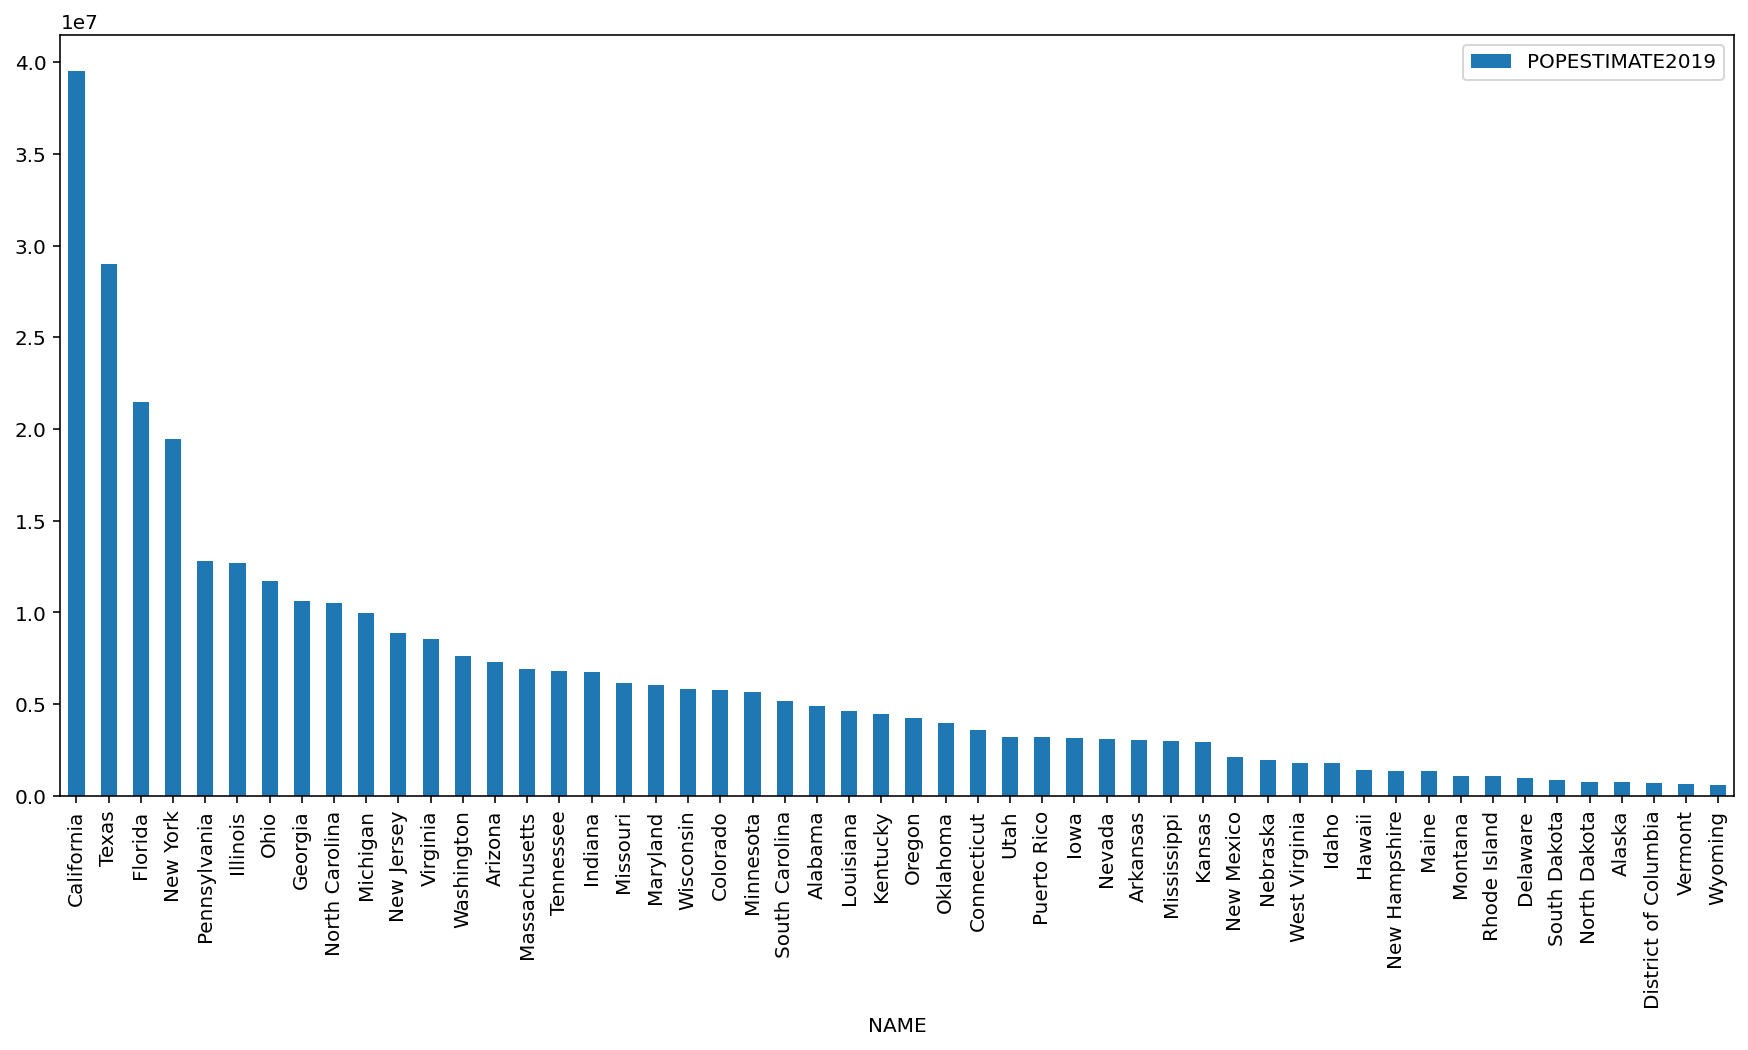

In [0]:
state_pop_df = state_pop_df.sort_values(by='POPESTIMATE2019', ascending=False) # sort by descending order
state_pop_df.plot(x='NAME', y='POPESTIMATE2019', figsize=(15,7), kind='bar')
plt.show()

### Cases per capita

We are interested in the number of cases per capita (the number of confirmed cases in every, say, 100 people). So we have to combine the two dataframes we have before: `state_pop_df` and `cases_df` and divide two columns of numbers.

In [0]:
# Recall the dateframe
state_pop_df.head(5)

,NAME,STATE,POPESTIMATE2019
9,California,6,39512223
48,Texas,48,28995881
14,Florida,12,21477737
37,New York,36,19453561
43,Pennsylvania,42,12801989


In [0]:
cases_df.head(5)

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,cfr
23,2020-06-04,Michigan,26,59215,5604,58211.0,5595.0,1004.0,9.0,0.096116
49,2020-06-04,Virgin Islands,78,71,6,71.0,6.0,0.0,0.0,0.084507
36,2020-06-04,Northern Mariana Islands,69,26,2,26.0,2.0,0.0,0.0,0.076923
31,2020-06-04,New Jersey,34,162530,11970,162530.0,11970.0,0.0,0.0,0.073648
22,2020-06-04,Massachusetts,25,102063,7201,98376.0,7062.0,3687.0,139.0,0.071786


In [0]:
# To merge these two tables, we have to rename STATE to fips
state_pop_df.rename(columns={'STATE':'fips'}, inplace=True)
state_pop_df.head(5)

,NAME,fips,POPESTIMATE2019
9,California,6,39512223
48,Texas,48,28995881
14,Florida,12,21477737
37,New York,36,19453561
43,Pennsylvania,42,12801989


In [0]:
# Now we can merge by matching the fips code in two tables
merge_df = pd.merge(cases_df, state_pop_df, on='fips')
merge_df.head(5)

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,cfr,NAME,POPESTIMATE2019
0,2020-06-04,Michigan,26,59215,5604,58211.0,5595.0,1004.0,9.0,0.096116,Michigan,9986857
1,2020-06-04,New Jersey,34,162530,11970,162530.0,11970.0,0.0,0.0,0.073648,New Jersey,8882190
2,2020-06-04,Massachusetts,25,102063,7201,98376.0,7062.0,3687.0,139.0,0.071786,Massachusetts,6892503
3,2020-06-04,New York,36,379977,30011,375217.0,25251.0,4760.0,4760.0,0.067297,New York,19453561
4,2020-06-04,Louisiana,22,41673,2883,41562.0,2772.0,111.0,111.0,0.066696,Louisiana,4648794


In [0]:
# We can add and delete some columns in this newly created dataframe
merge_df = merge_df.drop(columns=['NAME']) # remove the extra state name
merge_df['confirmed_cases_percent'] = merge_df['confirmed_cases']*100/merge_df['POPESTIMATE2019'] # add new column
merge_df['confirmed_deaths_percent'] = merge_df['confirmed_deaths']*100/merge_df['POPESTIMATE2019']
merge_df.head(5)

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,cfr,POPESTIMATE2019,confirmed_cases_percent,confirmed_deaths_percent
0,2020-06-04,Michigan,26,59215,5604,58211.0,5595.0,1004.0,9.0,0.096116,9986857,0.582876,0.056024
1,2020-06-04,New Jersey,34,162530,11970,162530.0,11970.0,0.0,0.0,0.073648,8882190,1.829842,0.134764
2,2020-06-04,Massachusetts,25,102063,7201,98376.0,7062.0,3687.0,139.0,0.071786,6892503,1.427290,0.102459
3,2020-06-04,New York,36,379977,30011,375217.0,25251.0,4760.0,4760.0,0.067297,19453561,1.928783,0.129801
4,2020-06-04,Louisiana,22,41673,2883,41562.0,2772.0,111.0,111.0,0.066696,4648794,0.894038,0.059628


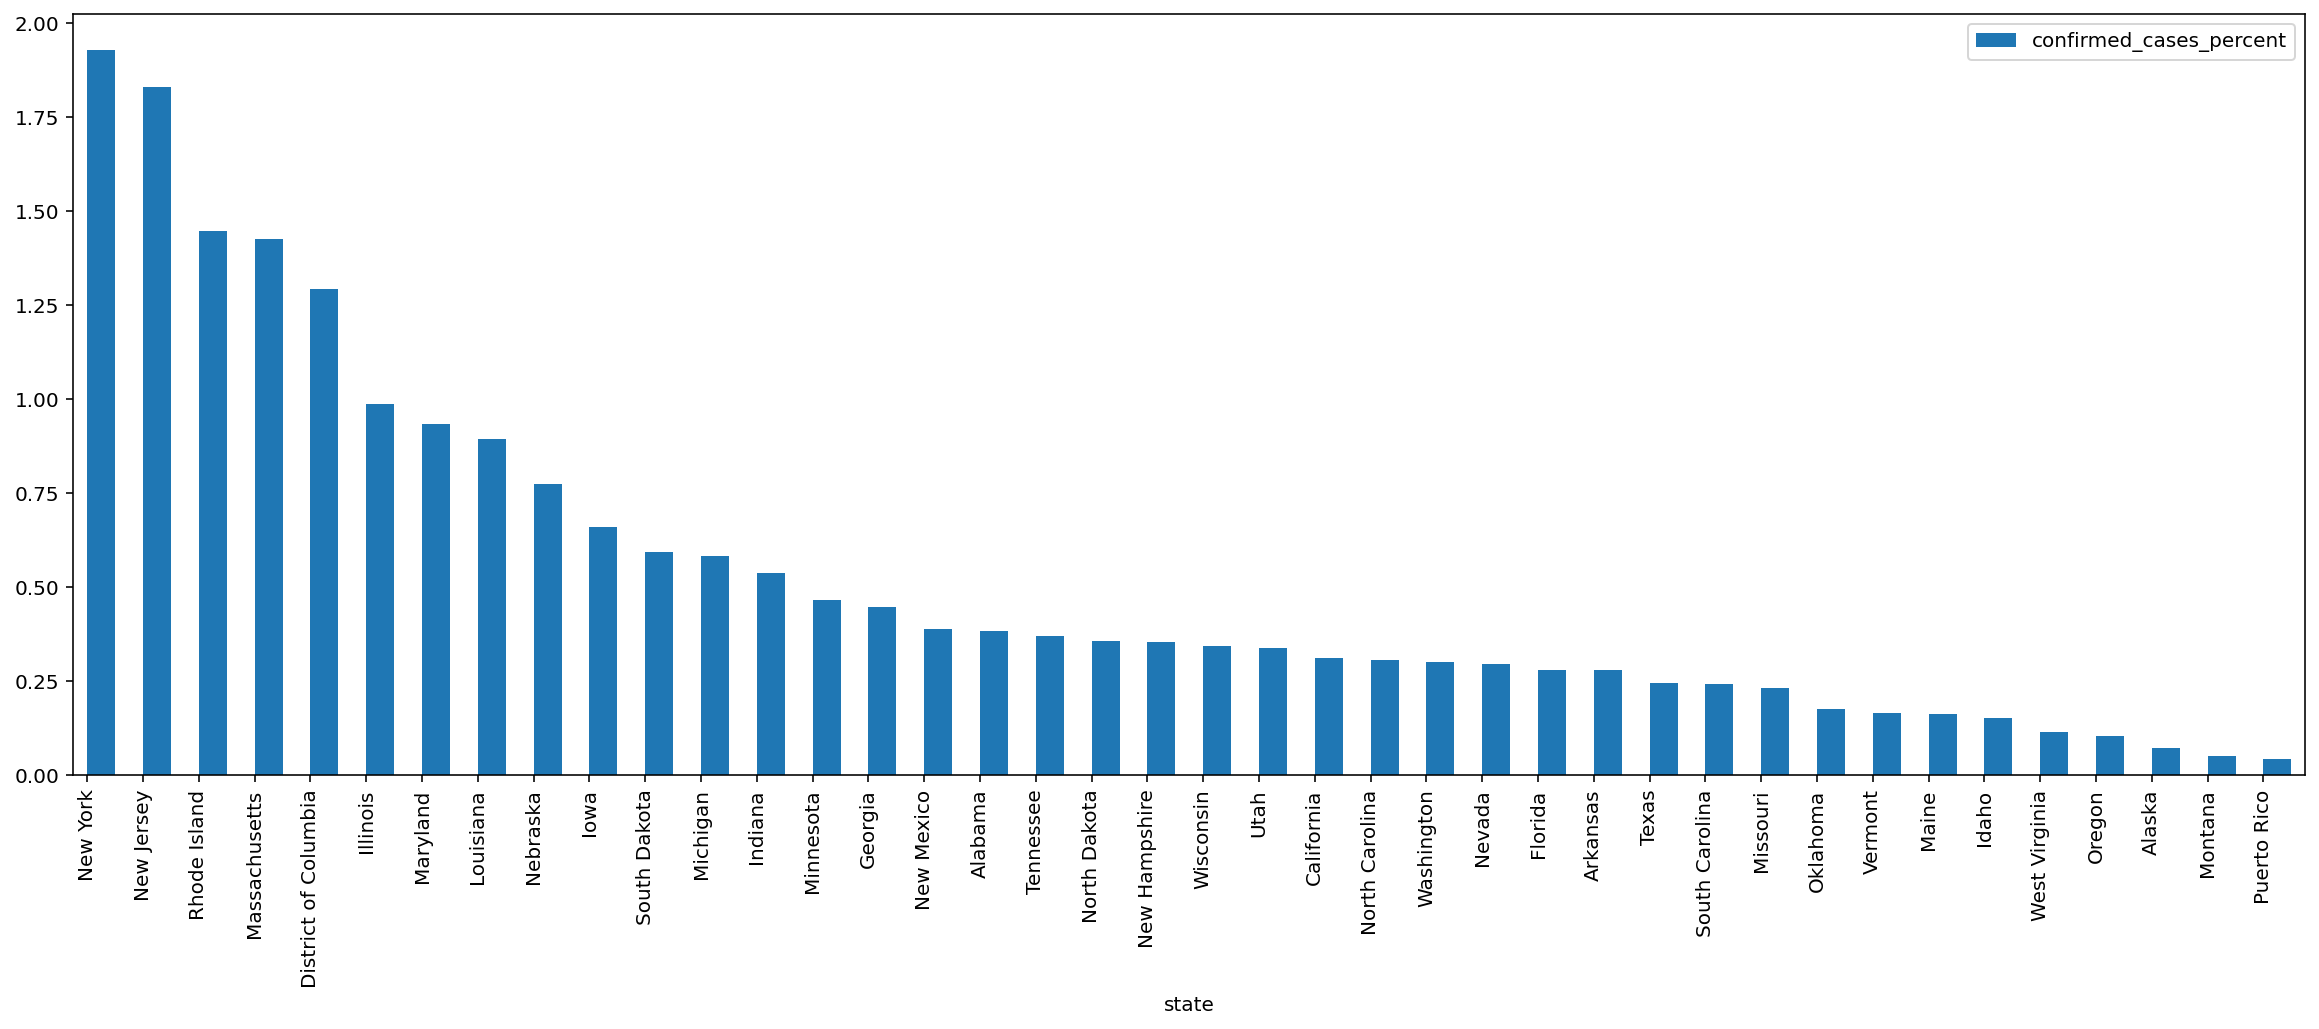

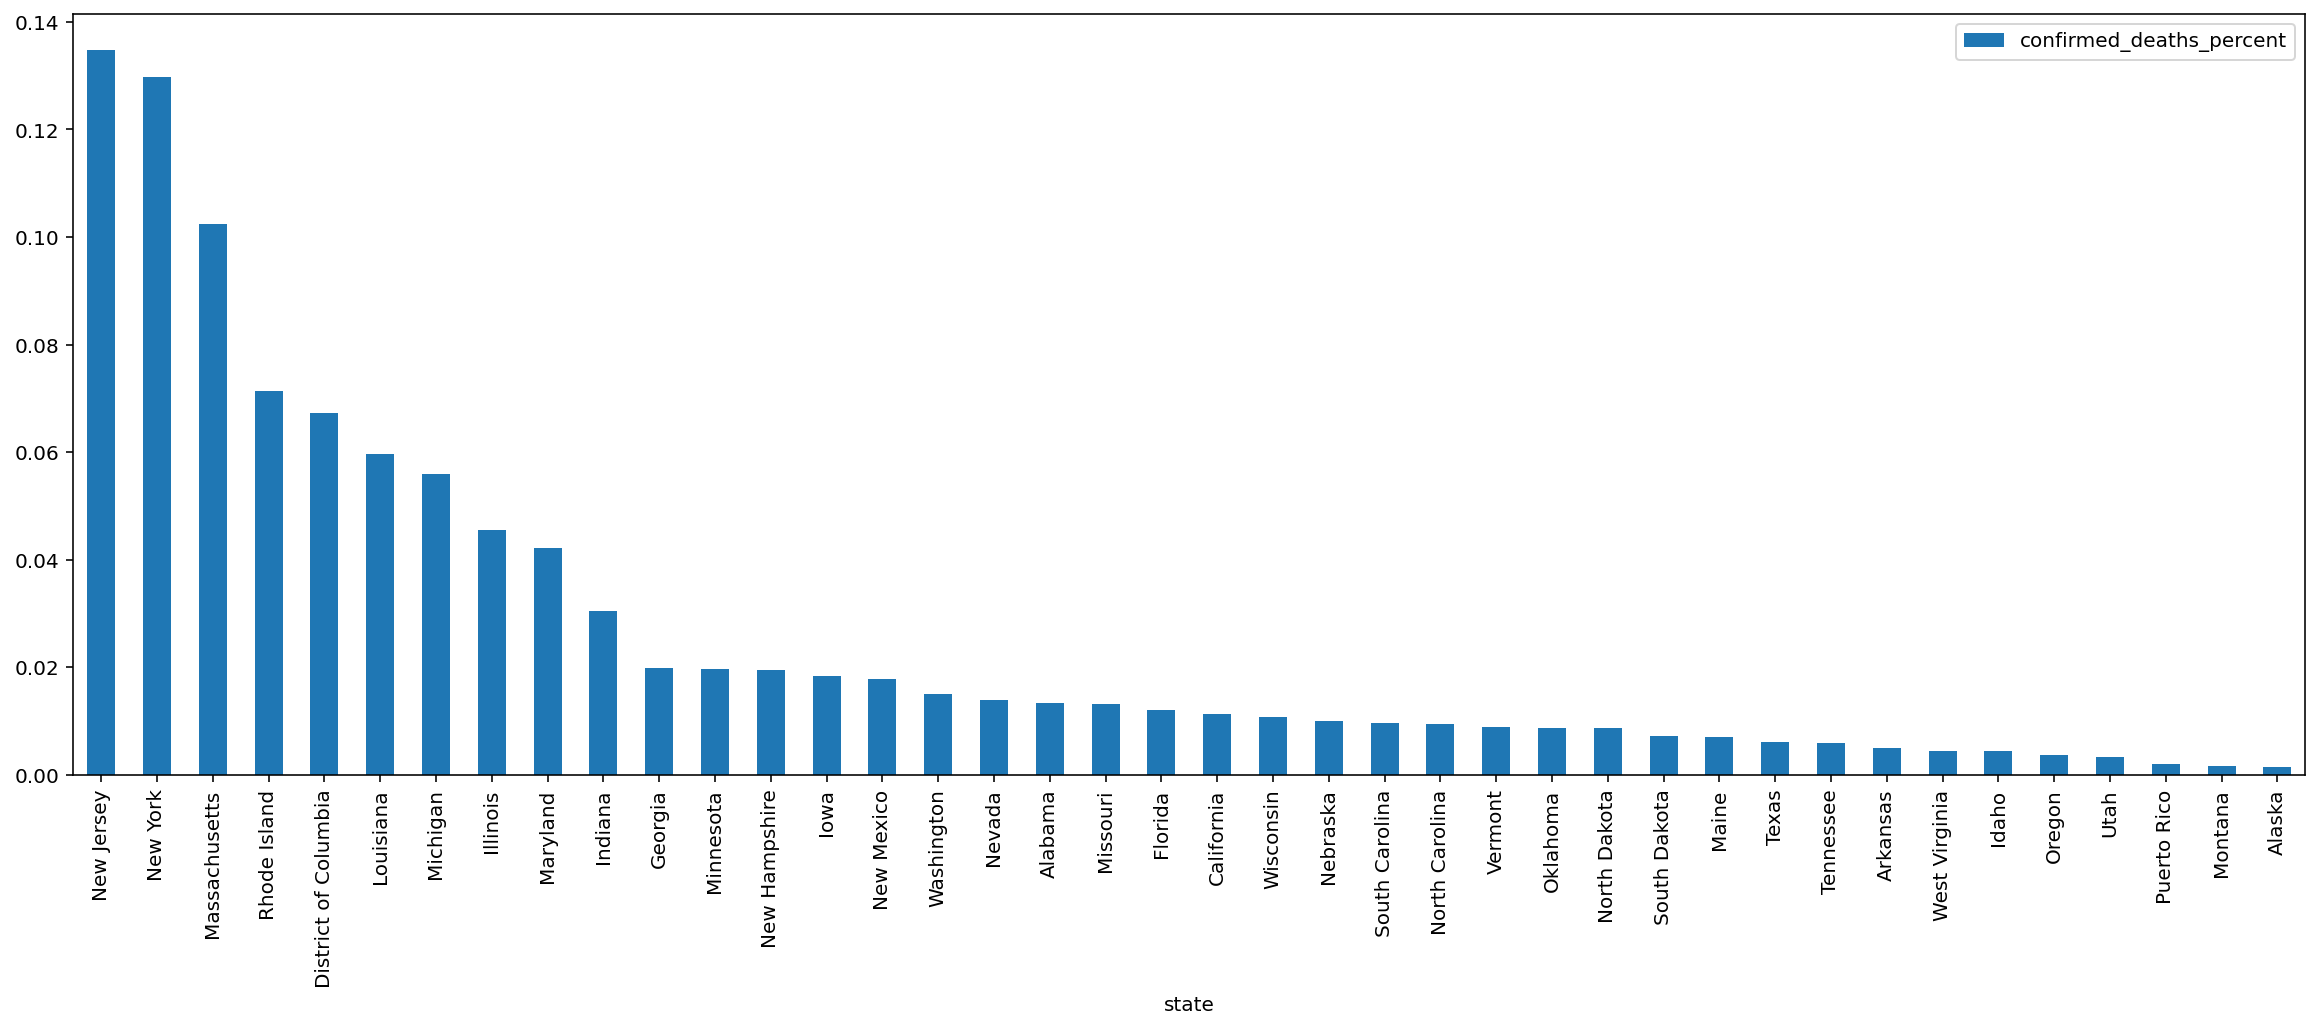

In [0]:
# Make new plots
merge_df = merge_df.sort_values(by='confirmed_cases_percent', ascending=False) # sort by descending order
ax1 = merge_df.plot.bar(x='state', y='confirmed_cases_percent', 
                   figsize=(20,7), position=0) # use pandas integration of matplotlib

merge_df = merge_df.sort_values(by='confirmed_deaths_percent', ascending=False) # sort by descending order
ax2 = merge_df.plot.bar(x='state', y='confirmed_deaths_percent', 
                  figsize=(20,7)) # use pandas integration of matplotlib